# Segment Shopping Customers
Problem Statement: understand the Target Customers for the marketing team to plan a strategy

Context: Your boss wants you to identify the most important shopping groups based on income, age, and the mall shopping score. He wants the ideal number of groups with a label for each.

Divide your mall target market into approachable groups. Create subsets of a market based on demographics behavioral criteria to better understand the target for marketing activities.


# The Approach
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use KMEANS Clustering Algorithm to create our segments
3. Use Summary Statistics on the clusters
4. Visualize

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

import os
import sys

In [2]:
# Get the current working directory
current_dir = os.getcwd()
# Move up one level from the current directory
parent_dir = os.path.dirname(current_dir)
# Change directory into db directory
data_dir = os.path.join(parent_dir, 'data')

In [3]:
df = pd.read_csv(os.path.join(data_dir, 'customer_data.csv'), index_col=None)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

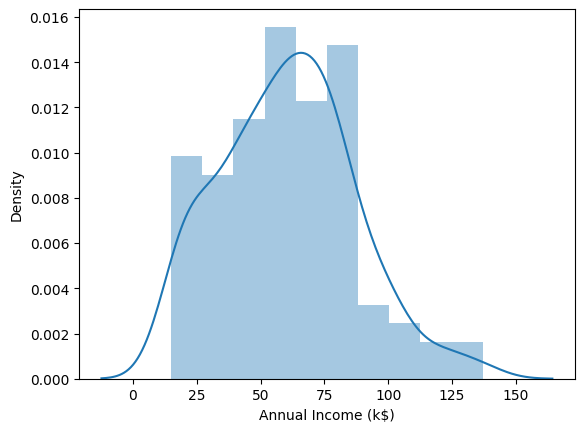

In [6]:
sns.distplot(df['Annual Income (k$)'])

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

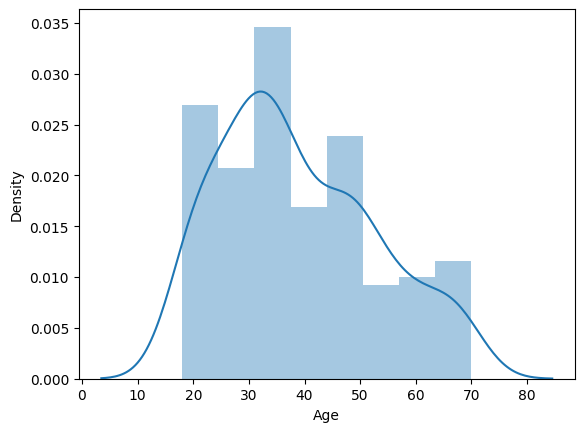

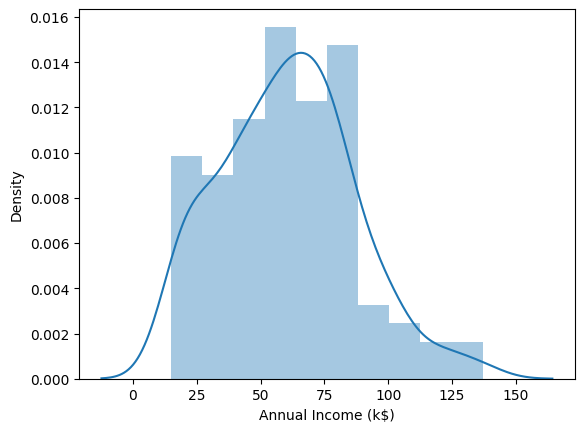

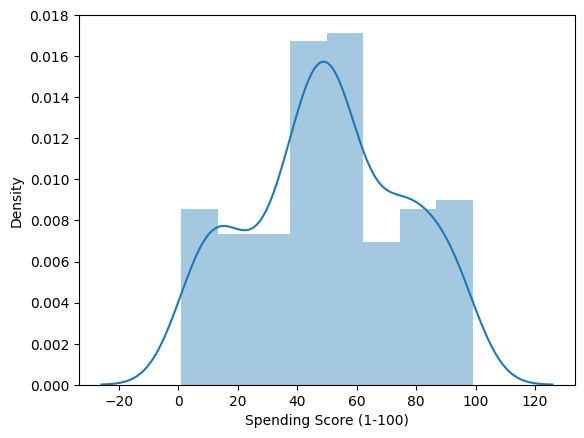

In [8]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

# Everything is normally distributed

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


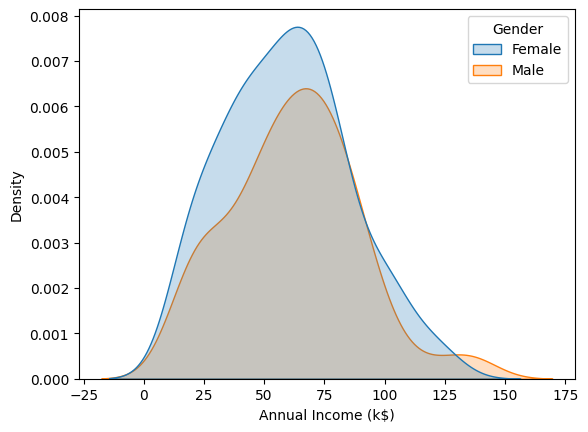

In [16]:
# Plotting
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', shade=True)

# Show plot
plt.show()

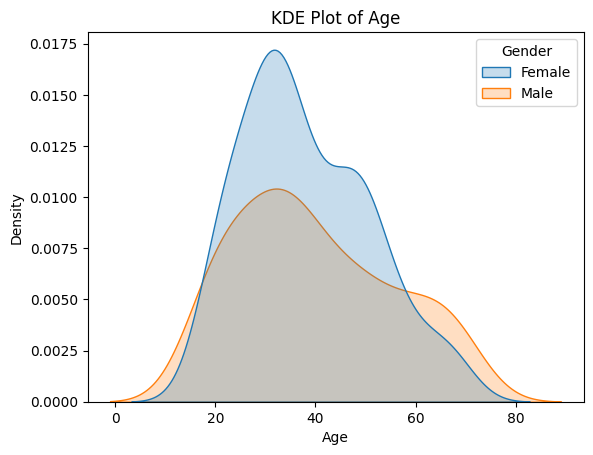

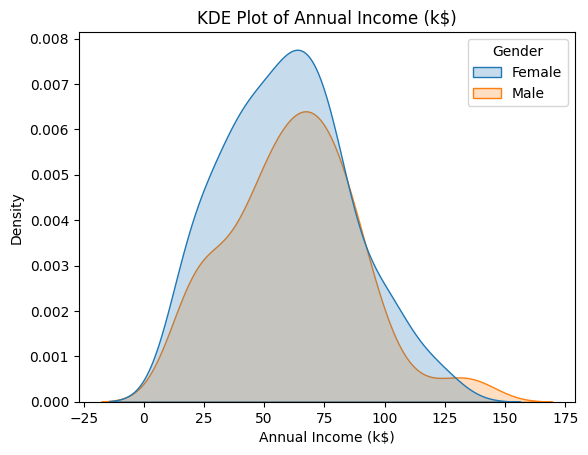

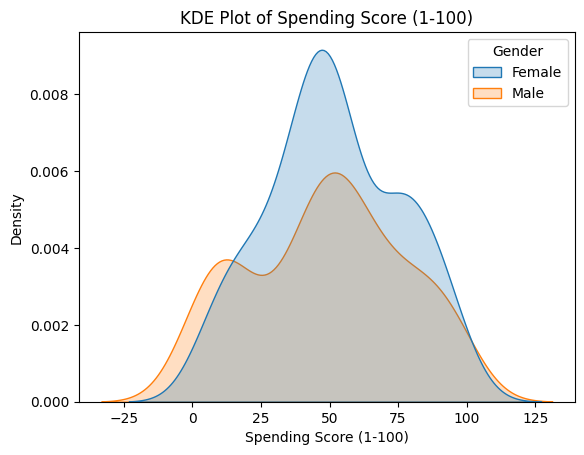

In [18]:
# Columns to plot
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Generate KDE plots for each column
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, hue='Gender', shade=True)
    plt.title(f'KDE Plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Density')

# Show plots
plt.show()

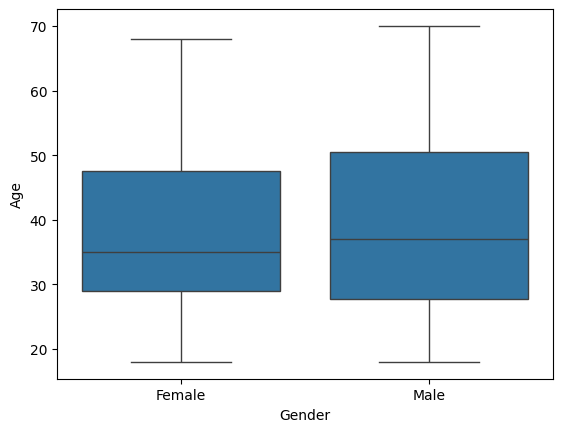

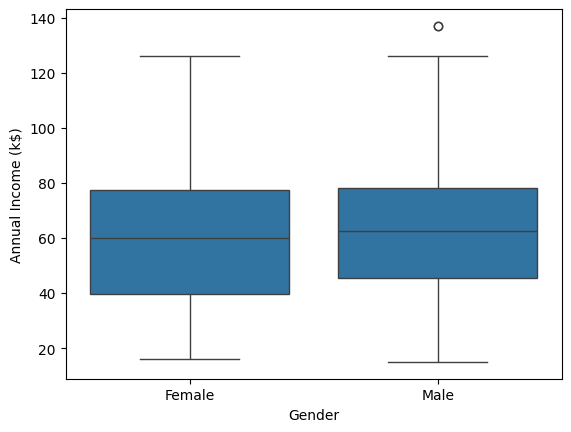

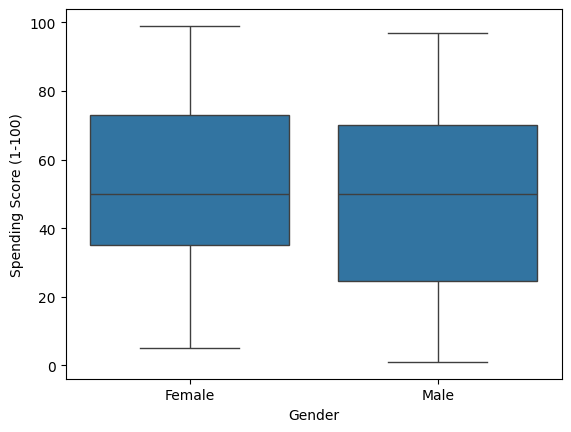

In [19]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data = df, x = 'Gender',y = df[i])

In [21]:
df['Gender'].value_counts(normalize = True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

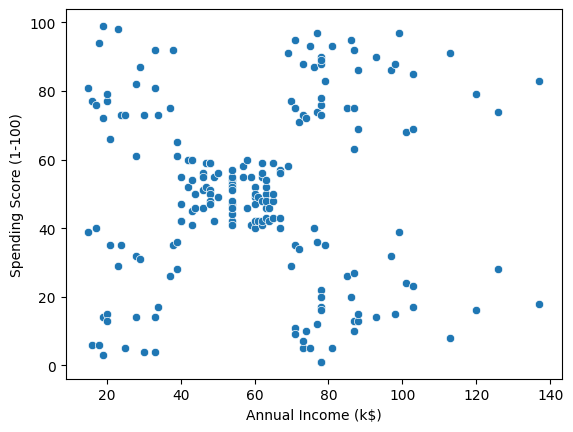

In [22]:
sns.scatterplot(data = df, x='Annual Income (k$)', y='Spending Score (1-100)')

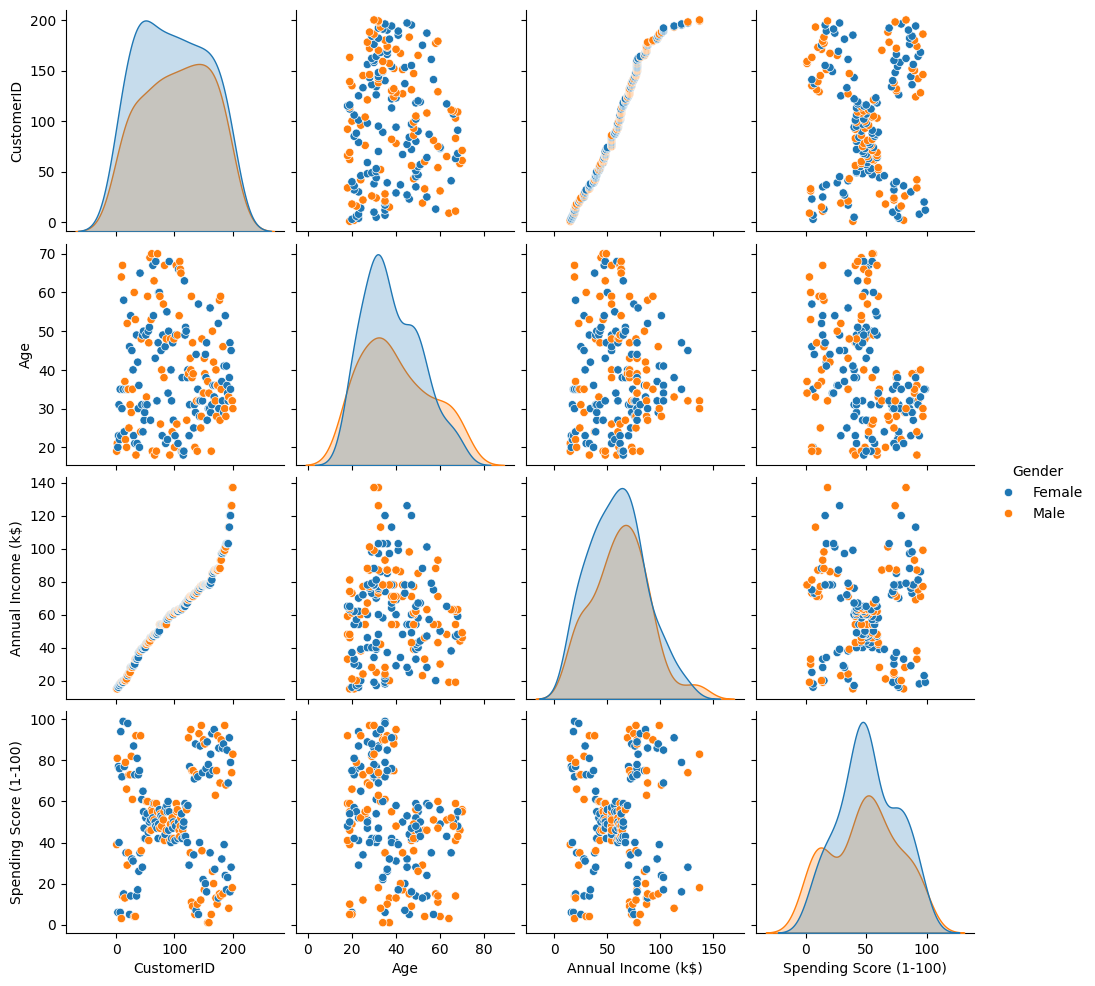

In [29]:
df_numerical = df.drop('CustomerID', axis = 1)
sns.pairplot(df,hue='Gender')

In [25]:
# Group by 'Gender' and aggregate
result = df.groupby('Gender').agg({
    'Age': ['mean', 'median', 'max', 'min'],
    'Annual Income (k$)': ['mean', 'median', 'max', 'min'],
    'Spending Score (1-100)': ['mean', 'median', 'max', 'min']
})

print(result)

              Age                Annual Income (k$)                  \
             mean median max min               mean median  max min   
Gender                                                                
Female  38.098214   35.0  68  18          59.250000   60.0  126  16   
Male    39.806818   37.0  70  18          62.227273   62.5  137  15   

       Spending Score (1-100)                 
                         mean median max min  
Gender                                        
Female              51.526786   50.0  99   5  
Male                48.511364   50.0  97   1  


In [30]:
df.pivot_table(index = 'Gender',values = ['Age', 'Annual Income (k$)','Spending Score (1-100)'], aggfunc =[np.mean,np.median])

mean                                           median  \
              Age Annual Income (k$) Spending Score (1-100)    Age   
Gender                                                               
Female  38.098214          59.250000              51.526786   35.0   
Male    39.806818          62.227273              48.511364   37.0   

                                                  
       Annual Income (k$) Spending Score (1-100)  
Gender                                            
Female               60.0                   50.0  
Male                 62.5                   50.0

In [31]:
df.iloc[:, 3:5]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [32]:
df_numerical = df_numerical.drop('Gender', axis = 1)

In [34]:
df_numerical.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

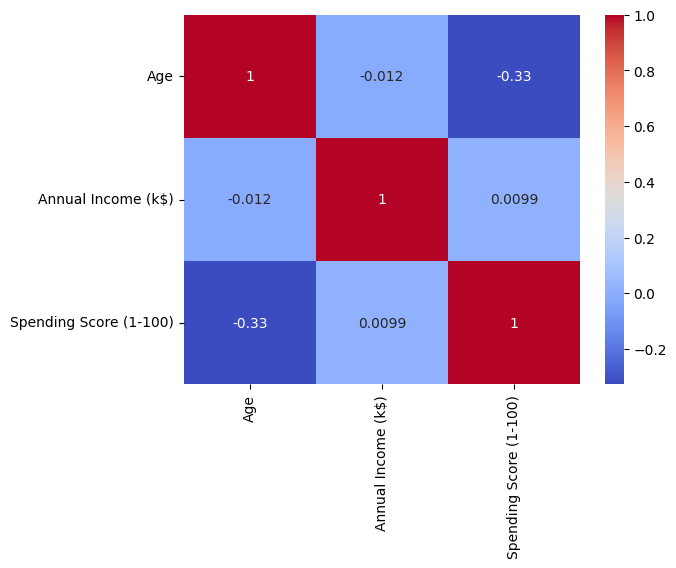

In [35]:
sns.heatmap(df_numerical.corr(),annot = True, cmap = 'coolwarm' )

# Clustering - Univariate, Bivariate, Multivariate

In [36]:
clustering1 = KMeans(n_clusters = 3)

In [37]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [38]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [39]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [40]:
df['Income Cluster'].value_counts()

Income Cluster
1    104
0     74
2     22
Name: count, dtype: int64

In [41]:
clustering1.inertia_ #clustering1 score

24361.259213759222

In [42]:
inertia_scores =[]
for i in range (1,20):
    kmeans=KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
    print(i, kmeans.inertia_)

1 137277.27999999997
2 48660.88888888889
3 23528.15217391304
4 14647.235170393064
5 8481.496190476191
6 5103.823725981621
7 4500.291857849753
8 2857.4416971916976
9 2376.173051948052
10 1985.4489843489846
11 1709.7082251082247
12 1043.8091575091576
13 940.0055555555555
14 795.3935786435785
15 727.524603174603
16 626.3842712842713
17 486.4277777777778
18 434.2507215007215
19 368.17619047619047


([<matplotlib.axis.XTick at 0x286ffe823f0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

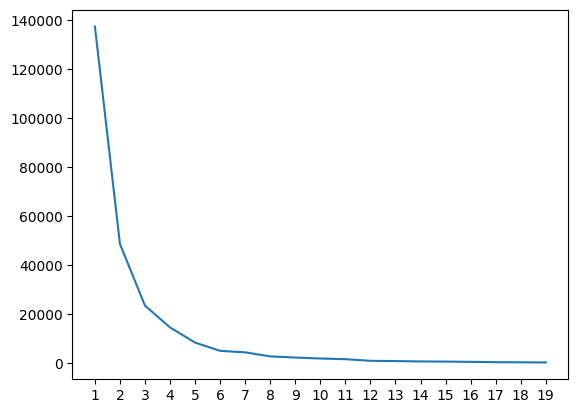

In [43]:
plt.plot(range(1,20),inertia_scores)
plt.xticks(range(1,20))
#Elbow start at 3, change number of clusters to 3

In [46]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.663462,69.750000,49.798077
2,37.545455,108.181818,52.000000


# Bivariate Clustering

In [47]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,3


[269981.28, 184131.88502788503, 106348.37306211119, 73880.64496247195, 44448.45544793371, 38858.9599751439, 31908.369338905773, 30633.353361855538, 23217.528237098224, 21251.341425886778, 19360.18264213812, 16838.516360524507, 15243.595845617794, 13120.300734791523, 14182.935510078158, 12143.514460539462, 11371.421118012424, 10930.133105371468, 9666.917062040768]


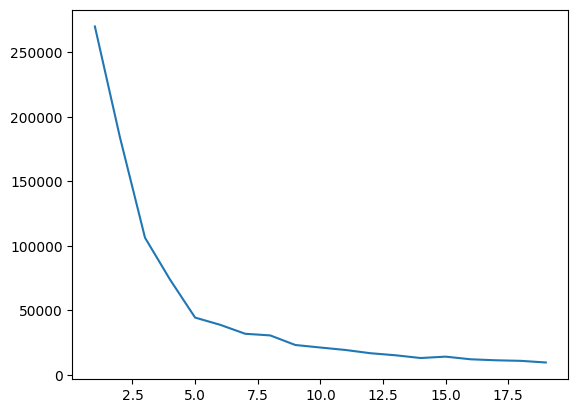

In [48]:
inertia_scores2 =[]
for i in range (1,20):
    kmeans2=KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
print(inertia_scores2)
plt.plot(range(1,20),inertia_scores2)


In [49]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']

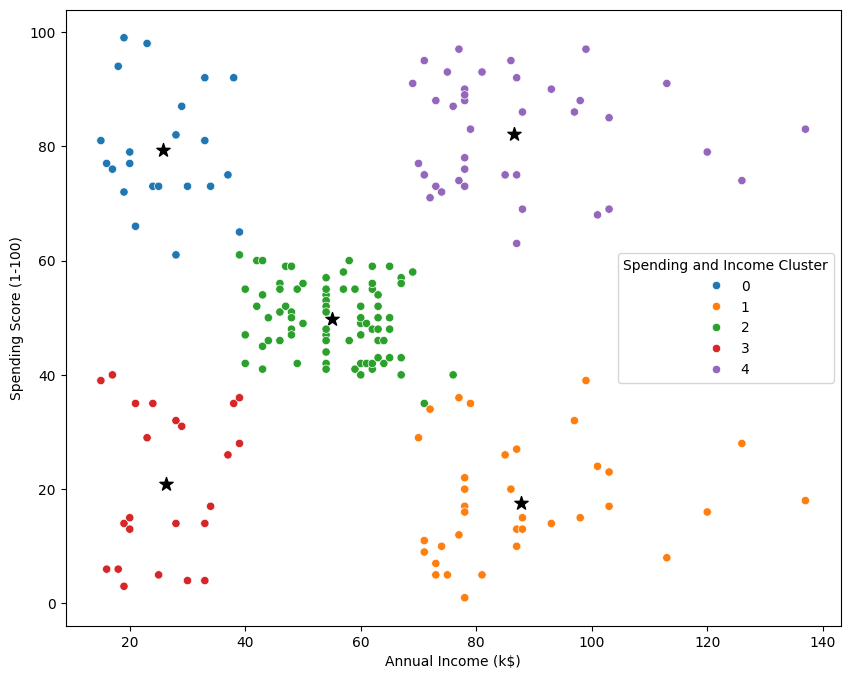

In [50]:
plt.figure(figsize =(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s  = 100, c='black',marker ='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',hue = 'Spending and Income Cluster',palette = 'tab10')
plt.savefig('clustering_biavariate.png')

In [51]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.472222,0.527778
2,0.587500,0.412500
3,0.608696,0.391304
4,0.538462,0.461538


In [54]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg([np.mean, np.median])

Age        Annual Income (k$)         \
                                  mean median               mean median   
Spending and Income Cluster                                               
0                            25.272727   23.5          25.727273   24.5   
1                            40.666667   41.5          87.750000   83.0   
2                            42.937500   46.5          55.087500   54.0   
3                            45.217391   46.0          26.304348   25.0   
4                            32.692308   32.0          86.538462   79.0   

                            Spending Score (1-100)         
                                              mean median  
Spending and Income Cluster                                
0                                        79.363636   77.0  
1                                        17.583333   16.0  
2                                        49.712500   50.0  
3                                        20.913043   17.0  
4                                        82.128205   83.0

# Multivariate Clustering

In [55]:
from sklearn.preprocessing import StandardScaler


In [56]:
scale = StandardScaler()

In [57]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,3


In [58]:
dff= pd.get_dummies(df)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Female,Gender_Male
0,1,19,15,39,0,3,False,True
1,2,21,15,81,0,0,False,True
2,3,20,16,6,0,3,True,False
3,4,23,16,77,0,0,True,False
4,5,31,17,40,0,3,True,False


In [59]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [60]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]

In [61]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [62]:
dff = scale.fit_transform(dff)

In [63]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


[800.0000000000002, 597.947293793228, 495.3090629076207, 386.8284255837668, 351.78232417212644, 309.0857828255023, 248.49558634959902, 211.4628551009059, 174.25047601247127, 166.13699599433045, 137.61748566430455, 131.78680303333206, 123.23627274762472, 115.181396403854, 104.81693529276696, 108.32718162131752, 89.83363880397484, 87.35263640138513, 83.70259848959867]


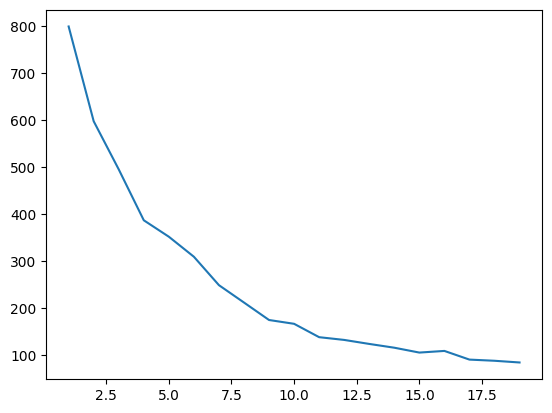

In [64]:
inertia_scores3 =[]
for i in range (1,20):
    kmeans3=KMeans(n_clusters = i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
print(inertia_scores3)
plt.plot(range(1,20),inertia_scores3)


# Target Cluster
Target group would be cluster 1 which has a high Spending Score and high income

54 percent of cluster 1 shoppers are women. We should look for ways to attract these customers using a marketing campaign targeting popular items in this cluster

Cluster 2 presents an interesting opportunity to market to the customers for sales event on   popular items.
